In [1]:
import numpy as np
import scipy.io as spio

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append('../../utils/')

from analytical_fit import Get_Det_And_Rates
from basis_utils import Sx,Sy,Sz

In [2]:
import openfermion as of

of.commutator(Sy(0)*Sx(1),Sz(0)*Sz(1))


0

In [3]:
def get_coords(filename):

    loadMat = spio.loadmat(filename,squeeze_me=True)

    coords = loadMat['spin_system']['inter'].item()['coordinates'].item()

    rep_coords = np.zeros([len(coords),3])

    for i in range(len(coords)):
        
        rep_coords[i,:] = coords[i]

    return rep_coords


def get_zeemanfreqs(filename):
    """
    Get zeeman frequencies as the average of the zeeman frequency tensors for each spin 
    """

    loadMat = spio.loadmat(filename,squeeze_me=True)
    zeem_mats = loadMat['spin_system']['inter'].item()['zeeman'].item()['matrix'].item()

    freqs = np.zeros(len(zeem_mats))

    for i in range(len(freqs)):
        freqs[i] = np.trace(zeem_mats[i])/3.0

    return freqs

def get_chemshifts(filename):
    """
    Return list of chemical shifts in rad s-1 for all nuclei, zero-ing the lowest-frequency spins 
    """
    
    zeemanfreqs = get_zeemanfreqs(filename)

    Nspins = len(zeemanfreqs)

    min_freq = np.min(zeemanfreqs)

    return zeemanfreqs-min_freq


def get_Jcouplings(filename):


    loadcoups = spio.loadmat(filename,squeeze_me=True)

    testJmat = loadcoups['Couplings']['inter'].item()['coupling'].item()['scalar'].item()
    testC = loadcoups['Couplings']['carbon13'].item()
    testN = loadcoups['Couplings']['nitrogen15'].item()
    testD = loadcoups['Couplings']['deuterons'].item()
    testsum = testC+testN+testD

    rm_idxs = np.where(testsum == 1)[0]

    filt_mat = np.delete(testJmat,rm_idxs, axis=0)
    filt_mat = np.delete(filt_mat,rm_idxs,axis=1)

    ###Cleaning up the matrix of J couplings....
    
    for i in range(filt_mat.shape[0]):
        for j in range(filt_mat.shape[1]):
            if isinstance(filt_mat[i, j], np.ndarray):
                filt_mat[i, j] = 0.0


    return filt_mat



In [8]:
#root_gb1_files ='../../../matlab_analysis/'
root_gb1_files ='./'

gb1_sys = root_gb1_files+'gb1_allmeths.mat'
#gb1_sys = root_gb1_files+'gb1_LEU_VAL_ILE.mat'
gb1_coups = root_gb1_files+'intercouplings.mat'


loadMat = spio.loadmat(gb1_sys,squeeze_me=True)
#loadcoups = spio.loadmat(gb1_coups,squeeze_me=True)


In [9]:
load_coups =  spio.loadmat(gb1_coups,squeeze_me=True)

In [10]:
load_coups['Couplings']

array((array((array((array([129.993, 53.806, 175.906, 33.765, 31.965, 17.087, 4.564, 1.877,
       1.972, 2.436, 2.522, 1.993, 1.993, 1.993, 113.784, 44.309, 171.605,
       8.503, 3.677, 4.365, 118.175, 62.606, 174.049, 69.335, 21.579,
       8.12, 4.847, 3.804, 1.141, 1.141, 1.141, 128.383, 56.604, 174.343,
       42.726, 133.371, 133.097, 117.476, 117.46, 9.322, 5.286, 2.763,
       3.297, 7.136, 7.136, 6.944, 6.944, 124.578, 54.879, 172.719,
       35.767, 25.366, 28.945, 41.768, 9.119, 5.17, 1.795, 1.987, 1.271,
       1.406, 1.555, 1.555, 2.705, 2.794, 128.438, 52.515, 174.539,
       42.445, 26.944, 24.389, 25.792, 8.571, 4.861, -1.182, 0.703, 0.809,
       0.471, 0.471, 0.471, 0.528, 0.528, 0.528, 128.107, 60.133, 174.648,
       37.871, 27.143, 16.934, 12.532, 9.061, 4.248, 1.941, 1.03, 1.35,
       0.739, 0.739, 0.739, 0.707, 0.707, 0.707, 127.513, 54.269, 174.761,
       41.895, 27.264, 25.506, 25.758, 8.677, 4.405, 1.297, 1.4, 1.234,
       0.697, 0.697, 0.697, 0.707, 0.707

In [5]:
gb1_chemshifts = get_chemshifts(gb1_sys)
#gb1_Jmat = get_Jcouplings(gb1_coups)
gb1_coords = get_coords(gb1_sys)


In [6]:
for i in range(gb1_Jmat.shape[0]):
    for j in range(gb1_Jmat.shape[1]):
        if gb1_Jmat[i,j] != 0:
            print(gb1_Jmat[i,j])


NameError: name 'gb1_Jmat' is not defined

In [7]:
gb1_Jmatfloat = np.zeros([gb1_Jmat.shape[0],gb1_Jmat.shape[0]],dtype=float)

for i in range(gb1_Jmat.shape[0]):
    for j in range(gb1_Jmat.shape[1]):
        gb1_Jmatfloat[i,j] = float(gb1_Jmat[i,j])

NameError: name 'gb1_Jmat' is not defined

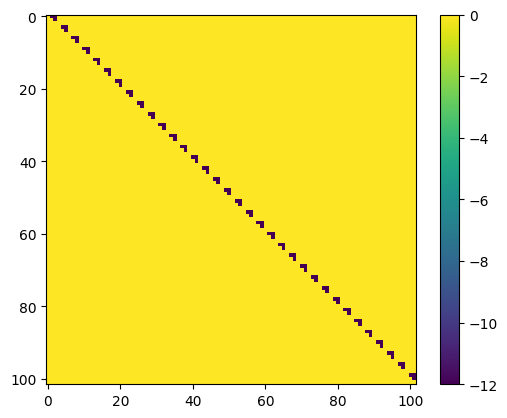

In [221]:
plt.imshow(gb1_Jmatfloat, cmap='viridis', interpolation='nearest')
# Add a color bar to sh-1j*ow the scale
plt.colorbar()

In [222]:
###Verification that the coordinates can be classified in clusters of three..
import numpy as np
from sklearn.cluster import DBSCAN

# Example: List of 3D coordinates
coordinates = np.copy(rep_coords)

# DBSCAN parameters
epsilon = 1.9  # Maximum distance between points to consider them part of the same cluster
min_samples = 3  # Minimum number of points to form a cluster

# Apply DBSCAN clustering
db = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean').fit(coordinates)
labels = db.labels_

# Group particles based on their cluster labels
clusters = {}
for idx, label in enumerate(labels):
    if label != -1:  # Ignore noise points (label = -1)
        if label not in clusters:
            clusters[label] = []
        clusters[label].append((idx, coordinates[idx]))

# Print the clusters
for cluster_id, cluster_particles in clusters.items():
    print(f"Cluster {cluster_id}:")
    for particle_idx, particle_coord in cluster_particles:
        print(f"  Particle {particle_idx}: {particle_coord}")


Cluster 0:
  Particle 0: [-14.427  -4.978  -3.921]
  Particle 1: [-13.875  -5.341  -2.273]
  Particle 2: [-14.91   -6.498  -3.125]
Cluster 1:
  Particle 3: [-8.159  0.669 -7.052]
  Particle 4: [-9.04   0.611 -8.582]
  Particle 5: [-9.109 -0.772 -7.47 ]
Cluster 2:
  Particle 6: [ 1.207  1.561 -0.435]
  Particle 7: [2.096 0.191 0.206]
  Particle 8: [0.32  0.134 0.122]
Cluster 3:
  Particle 9: [ 0.708 -2.191 -1.46 ]
  Particle 10: [ 2.368 -1.836 -0.965]
  Particle 11: [ 1.968 -1.978 -2.683]
Cluster 4:
  Particle 12: [ 3.837  5.832 -4.823]
  Particle 13: [ 3.636  7.054 -3.548]
  Particle 14: [ 4.623  5.641 -3.241]
Cluster 5:
  Particle 15: [ 0.832  7.503 -2.991]
  Particle 16: [ 1.71   7.707 -4.531]
  Particle 17: [-0.013  7.336 -4.546]
Cluster 6:
  Particle 18: [ 5.105 -2.606 -3.945]
  Particle 19: [ 6.778 -2.174 -3.54 ]
  Particle 20: [ 6.007 -1.5   -4.988]
Cluster 7:
  Particle 21: [ 4.536 -2.002 -1.714]
  Particle 22: [ 4.529 -0.33  -1.167]
  Particle 23: [ 6.06  -1.246 -1.201]
Cluster

In [23]:
#we compute distances between the clusters of hydrogen atoms, and average the angular zeeman frequencies and chemical shifts...

ang_zeeman_freqs = get_zeemanfreqs(gb1_sys)

Neffspins = int(len(gb1_coords)/3)

Av_coords = np.zeros([Neffspins,3])
Av_zeem_freqs = np.zeros([Neffspins])
Av_chem_shifts = np.zeros([Neffspins])


#gb1_coords
for i in range(Neffspins):

    init = i*3
    av_coord = np.zeros(3)
    av_chem = 0.0
    av_freq = 0.0

    for j in range(3):
        av_coord+=gb1_coords[init+j]
        av_chem+=gb1_chemshifts[init+j]
        av_freq+=ang_zeeman_freqs[init+j]
        
    Av_coords[i,:] = av_coord/3.0
    Av_chem_shifts[i] = av_chem/3.0
    Av_zeem_freqs[i] = av_freq/3.0




In [24]:
Av_chem_shifts

array([    0.        ,  4817.41413689,  8605.75624084,  8283.46444893,
        7090.41939831,  7271.35513973,  7327.89756012,  7271.35513973,
        5117.08895969,  7050.83970451,  6541.95793056,  9453.89253235,
        4851.33958817,  8747.11228848,  4336.8035717 ,  5965.22525215,
        5840.83192921,  4579.93597507,  4280.26115227,  4613.86142731,
        8634.02744961,  6988.64304352,  6423.21884823,  1136.50263119,
        7882.01327038,  6835.97851086,  4766.52595997,  3092.87034416,
        5507.23165417,  5987.84221935,  6089.61857414, 13570.18066788,
        9403.00435448,  4540.35628128])

In [25]:
len(Av_chem_shifts)

34

In [26]:
####To get the list of relaxation channels, we compile these parameters...

gammaH = 2.6752e8 #in (rad/s)/Tesla

w1 = -376417768.6316 
w2 = -376411775.1523 
#freqs = np.array([w1,w2])
tc = 5e-9
Nspins = len(Av_zeem_freqs)


list_jumps, list_damp_rates, list_dets=Get_Det_And_Rates(Av_zeem_freqs,tc,Av_coords*1e-10,Nspins,gammaH,Av_chem_shifts)




In [28]:
np.max(np.abs(list_damp_rates))

15.450920148375978

In [41]:
####Filtering out the "non-rotatory" jump operator terms...
filt_jumps = []
filt_damp_rates = []
#filt_dets = []

for i in range(len(list_jumps)):
    if list_dets[i] ==0 and list_damp_rates[i]>1.0:
        filt_jumps.append(list_jumps[i])
        filt_damp_rates.append(list_damp_rates[i])
        #filt_dets.append(list_dets)




In [42]:
np.max(filt_damp_rates)

15.450920148375978

In [43]:
len(list_damp_rates), len(filt_damp_rates)

(5979699, 487)

In [44]:
filt_jumps

[['S0zS15z', 'S0zS15z'],
 ['S0zS15z', 'S4zS30z'],
 ['S0zS15z', 'S6zS7z'],
 ['S0zS15z', 'S6zS23z'],
 ['S0zS15z', 'S7zS23z'],
 ['S0zS15z', 'S10zS25z'],
 ['S0zS15z', 'S14zS19z'],
 ['S0zS15z', 'S21zS22z'],
 ['S0zS15z', 'S31zS32z'],
 ['S0zS16z', 'S31zS32z'],
 ['S1zS12z', 'S3zS7z'],
 ['S1zS12z', 'S5zS29z'],
 ['S1zS12z', 'S21zS22z'],
 ['S1zS12z', 'S24zS31z'],
 ['S2zS3z', 'S2zS3z'],
 ['S2zS3z', 'S6zS7z'],
 ['S2zS3z', 'S6zS31z'],
 ['S2zS3z', 'S7zS31z'],
 ['S2zS3z', 'S9zS10z'],
 ['S2zS3z', 'S13zS20z'],
 ['S2zS3z', 'S14zS20z'],
 ['S2zS3z', 'S17zS20z'],
 ['S2zS3z', 'S23zS31z'],
 ['S2zS3z', 'S23zS32z'],
 ['S2zS3z', 'S24zS25z'],
 ['S2zS3z', 'S24zS32z'],
 ['S2zS3z', 'S27zS28z'],
 ['S2zS7z', 'S2zS7z'],
 ['S2zS7z', 'S4zS5z'],
 ['S2zS7z', 'S6zS10z'],
 ['S2zS7z', 'S9zS10z'],
 ['S2zS7z', 'S16zS19z'],
 ['S2zS7z', 'S19zS22z'],
 ['S2zS7z', 'S24zS31z'],
 ['S2zS11z', 'S7zS31z'],
 ['S2zS11z', 'S24zS25z'],
 ['S2zS23z', 'S4zS5z'],
 ['S2zS23z', 'S13zS21z'],
 ['S2zS31z', 'S2zS31z'],
 ['S2zS31z', 'S3zS7z'],
 ['S2zS3

In [279]:
filt_damp_rates

[10.68413024636984,
 10.214631937711992,
 15.450920148375978,
 10.138916419297919,
 11.003530145640717,
 11.168213695350135,
 10.138916419297919,
 10.491004937456228]

In [271]:
filt_damp_rates[14], filt_jumps[14]

(8.101663854899732, ['S6zS7z', 'S24zS25z'])

In [274]:
filt_damp_rates[11], filt_jumps[11]

(10.68413024636984, ['S6zS7z', 'S6zS7z'])

In [275]:
filt_jumps

[['S0zS15z', 'S7zS23z'],
 ['S2zS3z', 'S2zS3z'],
 ['S2zS3z', 'S7zS31z'],
 ['S2zS3z', 'S24zS25z'],
 ['S3zS7z', 'S3zS7z'],
 ['S3zS11z', 'S15zS16z'],
 ['S3zS11z', 'S31zS32z'],
 ['S4zS5z', 'S4zS5z'],
 ['S4zS5z', 'S24zS31z'],
 ['S5zS29z', 'S5zS29z'],
 ['S5zS29z', 'S21zS22z'],
 ['S6zS7z', 'S6zS7z'],
 ['S6zS7z', 'S7zS31z'],
 ['S6zS7z', 'S10zS25z'],
 ['S6zS7z', 'S24zS25z'],
 ['S7zS23z', 'S0zS15z'],
 ['S7zS23z', 'S7zS23z'],
 ['S7zS23z', 'S21zS22z'],
 ['S7zS31z', 'S2zS3z'],
 ['S7zS31z', 'S6zS7z'],
 ['S7zS31z', 'S7zS31z'],
 ['S7zS31z', 'S24zS25z'],
 ['S9zS10z', 'S9zS10z'],
 ['S9zS10z', 'S24zS25z'],
 ['S10zS25z', 'S6zS7z'],
 ['S10zS25z', 'S10zS25z'],
 ['S14zS20z', 'S14zS20z'],
 ['S15zS16z', 'S3zS11z'],
 ['S15zS16z', 'S15zS16z'],
 ['S15zS16z', 'S31zS32z'],
 ['S21zS22z', 'S5zS29z'],
 ['S21zS22z', 'S7zS23z'],
 ['S21zS22z', 'S21zS22z'],
 ['S24zS25z', 'S2zS3z'],
 ['S24zS25z', 'S6zS7z'],
 ['S24zS25z', 'S7zS31z'],
 ['S24zS25z', 'S9zS10z'],
 ['S24zS25z', 'S24zS25z'],
 ['S24zS31z', 'S4zS5z'],
 ['S24zS31z', 